### This is a Credit Card Approval Classification Model

#### TO DO LIST

Import Libraries and Dataset

Find Missing values

Encode Categorical Data

Feature Scaling

Split Dataset into Training and Test Set

Run the preffered Models for Cross Validation

Fit the chosen model into the Machine Learning Algorithm

We Test the Accuracy of our Model

#### We import our libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#### WE also import our data by using Pandas to read the csv file 

In [2]:
df = pd.read_csv('Credit_card.csv')
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


#### We observe our data by storing it in a variable called df and use functions such as describe and info

In [3]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

#### We find and handle missing values

In [5]:
for columns in df:
    unique = df[columns].unique()
    print(f'{columns}:, {unique}')

Ind_ID:, [5008827 5009744 5009746 ... 5115992 5118219 5053790]
GENDER:, ['M' 'F' nan]
Car_Owner:, ['Y' 'N']
Propert_Owner:, ['Y' 'N']
CHILDREN:, [ 0  1  2  4  3 14]
Annual_income:, [ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.

In [6]:
number_kids = df['CHILDREN'].value_counts().get(14, 0)
number_kids

1

#### We have noticed a single outlier in the number_kids column that could distort our training model, it also affects our number_family column, so we dropped it.

In [7]:
df = df[df['CHILDREN'] != 14]

In [8]:
number_family = df['Family_Members'].value_counts().get(15, 0)
number_family

0

In [9]:
df['Employed_days'].unique()

array([365243,   -586,   -678,  -1002,   -913,   -248,  -2470,  -1644,
        -4327,  -1674,  -1086,   -925,   -854,   -185,  -3350,   -691,
        -4770,  -2394,   -384,  -3647,  -1546,   -808,  -1285,   -855,
        -7369,  -2269,  -4114,  -1161,  -7288,   -166,   -866,   -564,
        -3366,  -2150,  -1458,  -8369,   -508,  -1567,   -137,  -3974,
        -1570,  -2878,   -140,  -2576,  -1905,  -1724,  -1328,  -4987,
        -3496,  -1394,  -1265,  -2531,  -2105,   -860,   -217,   -535,
        -6866,   -584,  -2227,  -8161,   -613,   -606,  -6944,   -346,
        -1808,  -3420,   -863,  -7413,  -7553,  -3931,  -1039,   -134,
         -622,  -1595,  -1626,  -1868,   -555,  -1935,   -931,   -900,
        -4305,   -499,  -2418,   -189,  -1132,  -1770,   -919,  -1081,
         -502,  -2420,  -1325,  -6367,  -2484,   -341,  -9422,  -3054,
        -2987,  -2128,   -820,   -141,  -1692,  -4686,   -693,   -567,
         -885,  -2769,  -1547,  -3179,  -5204,  -3072,   -320,  -2469,
      

In [10]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Our EDA so far;

    Employment_days column has invalid values.
    GENDER column has NAN values.
    Annual_income column has NAN values.
    Birthday_count column has NAN values.
    Type_Occupation column has NAN values.

In [11]:
df = df[df['Employed_days'] != 365243]

In [12]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [13]:
df.isnull().sum()

Ind_ID               0
GENDER               6
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       19
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      18
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    227
Family_Members       0
label                0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286 entries, 1 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1286 non-null   int64  
 1   GENDER           1280 non-null   object 
 2   Car_Owner        1286 non-null   object 
 3   Propert_Owner    1286 non-null   object 
 4   CHILDREN         1286 non-null   int64  
 5   Annual_income    1267 non-null   float64
 6   Type_Income      1286 non-null   object 
 7   EDUCATION        1286 non-null   object 
 8   Marital_status   1286 non-null   object 
 9   Housing_type     1286 non-null   object 
 10  Birthday_count   1268 non-null   float64
 11  Employed_days    1286 non-null   int64  
 12  Mobile_phone     1286 non-null   int64  
 13  Work_Phone       1286 non-null   int64  
 14  Phone            1286 non-null   int64  
 15  EMAIL_ID         1286 non-null   int64  
 16  Type_Occupation  1059 non-null   object 
 17  Family_Members   12

In [15]:
df['GENDER'].describe()

count     1280
unique       2
top          F
freq       759
Name: GENDER, dtype: object

In [16]:
df['GENDER'] = df['GENDER'].fillna(df['GENDER'].mode()[0])

In [17]:
df['GENDER'].describe()

count     1286
unique       2
top          F
freq       765
Name: GENDER, dtype: object

In [18]:
df['Annual_income'].describe()

count    1.267000e+03
mean     1.995593e+05
std      1.169906e+05
min      3.600000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.283750e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

In [19]:
mean_value = df['Annual_income'].mean()
mean_value

199559.25177584845

In [20]:
df['Annual_income'] = df['Annual_income'].fillna(mean_value)

In [21]:
df['Birthday_count'].describe()

count     1268.000000
mean    -14852.279968
std       3533.001511
min     -23844.000000
25%     -17571.250000
50%     -14595.500000
75%     -11935.750000
max      -7705.000000
Name: Birthday_count, dtype: float64

In [22]:
mean_birthday_count_value = round(df['Birthday_count'].mean(), 2)
mean_birthday_count_value

-14852.28

In [23]:
df['Birthday_count'] = df['Birthday_count'].fillna(mean_birthday_count_value)

In [24]:
df['Birthday_count'].info()

<class 'pandas.core.series.Series'>
Index: 1286 entries, 1 to 1547
Series name: Birthday_count
Non-Null Count  Dtype  
--------------  -----  
1286 non-null   float64
dtypes: float64(1)
memory usage: 20.1 KB


In [25]:
df['Birthday_count'] = df['Birthday_count'].abs()

In [26]:
df['Type_Occupation'].describe()

count         1059
unique          18
top       Laborers
freq           268
Name: Type_Occupation, dtype: object

In [27]:
df['Type_Occupation'] = df['Type_Occupation'].fillna('Others')
df.Type_Occupation.unique()

array(['Others', 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [28]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [29]:
df.drop('Ind_ID', axis = 1, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1286 entries, 1 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GENDER           1286 non-null   object 
 1   Car_Owner        1286 non-null   object 
 2   Propert_Owner    1286 non-null   object 
 3   CHILDREN         1286 non-null   int64  
 4   Annual_income    1286 non-null   float64
 5   Type_Income      1286 non-null   object 
 6   EDUCATION        1286 non-null   object 
 7   Marital_status   1286 non-null   object 
 8   Housing_type     1286 non-null   object 
 9   Birthday_count   1286 non-null   float64
 10  Employed_days    1286 non-null   int64  
 11  Mobile_phone     1286 non-null   int64  
 12  Work_Phone       1286 non-null   int64  
 13  Phone            1286 non-null   int64  
 14  EMAIL_ID         1286 non-null   int64  
 15  Type_Occupation  1286 non-null   object 
 16  Family_Members   1286 non-null   int64  
 17  label            12

In [31]:
df['Employed_days'] = df['Employed_days'].abs()

In [32]:
for columns in df:
    unique = df[columns].unique()
    print(f'{columns}:, {unique}')

GENDER:, ['F' 'M']
Car_Owner:, ['Y' 'N']
Propert_Owner:, ['N' 'Y']
CHILDREN:, [0 1 2 4 3]
Annual_income:, [ 315000.          199559.25177585  450000.           90000.
  472500.          270000.          126000.          202500.
  157500.          112500.          180000.          540000.
  292500.          135000.          215100.           67500.
  171000.          103500.          225000.          391500.
  360000.          256500.          675000.          247500.
   85500.          121500.          130500.          211500.
   72000.          195750.          585000.          216000.
  108000.           81000.           63000.          337500.
  117000.          445500.          234000.         1575000.
  144000.           73350.          193500.          900000.
   76500.           94500.          198000.          306000.
  166500.           99000.          153000.          423000.
  243000.          283500.          252000.          495000.
  612000.           36000.          1336

In [33]:
df['Birthday_count'].unique()

array([13557.  , 14852.28, 18173.  , ..., 10229.  , 15292.  , 16601.  ])

In [34]:
df.head(40)

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,13557.00,586,1,1,1,0,Others,2,1
2,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,14852.28,586,1,1,1,0,Others,2,1
3,F,Y,N,0,199559.251776,Commercial associate,Higher education,Married,House / apartment,13557.00,586,1,1,1,0,Others,2,1
4,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,13557.00,586,1,1,1,0,Others,2,1
5,F,Y,N,0,315000.000000,Pensioner,Higher education,Married,House / apartment,13557.00,586,1,1,1,0,Others,2,1
6,F,Y,N,0,315000.000000,Commercial associate,Higher education,Married,House / apartment,13557.00,586,1,1,1,0,Others,2,1
8,M,Y,Y,1,450000.000000,Commercial associate,Secondary / secondary special,Married,House / apartment,18173.00,678,1,0,1,1,Core staff,3,1
9,M,Y,Y,1,450000.000000,Pensioner,Secondary / secondary special,Married,House / apartment,18173.00,678,1,0,1,1,Core staff,3,1
10,M,Y,Y,1,450000.000000,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,18173.00,678,1,0,1,1,Core staff,1,1
11,F,Y,Y,0,90000.000000,Working,Secondary / secondary special,Married,House / apartment,18950.00,1002,1,1,1,0,Cooking staff,2,1


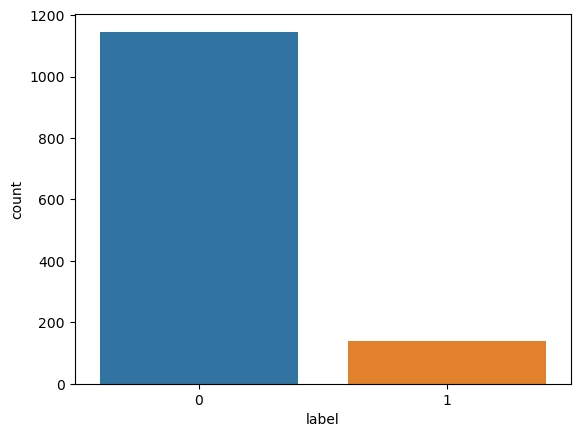

In [35]:
sns.countplot(x = df['label'])
plt.show()

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


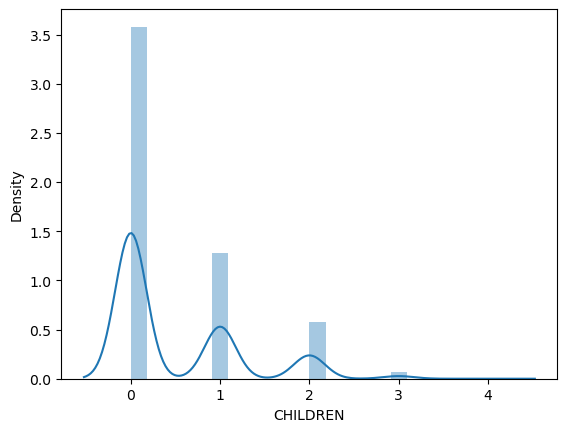

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


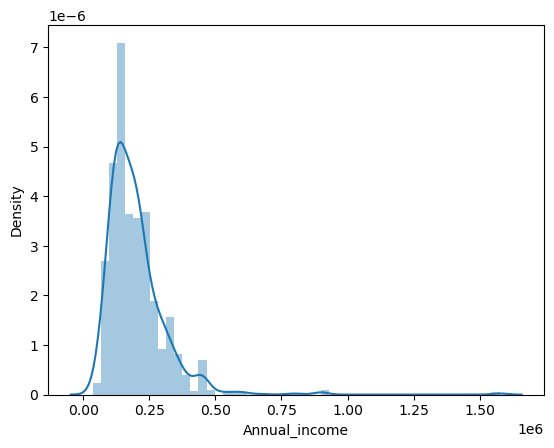

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


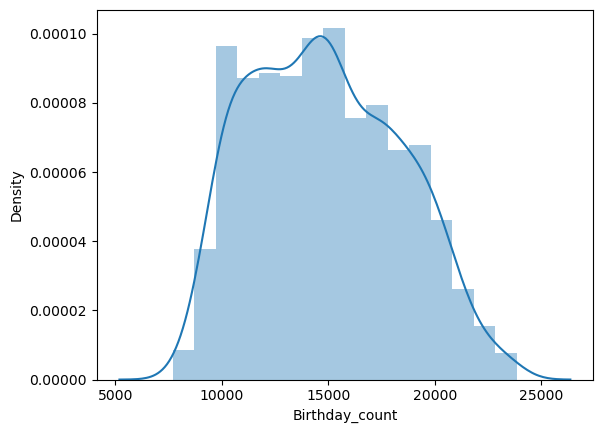

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


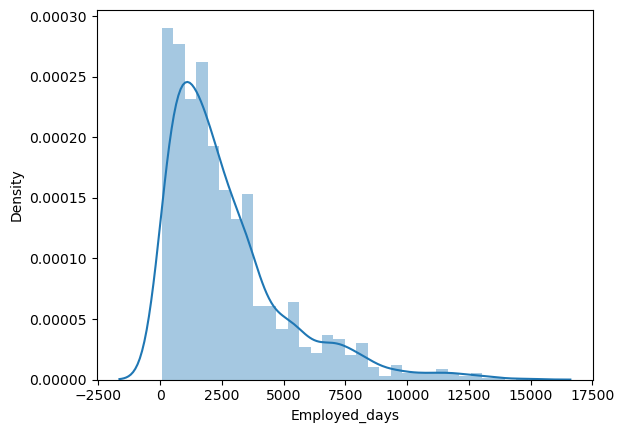

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


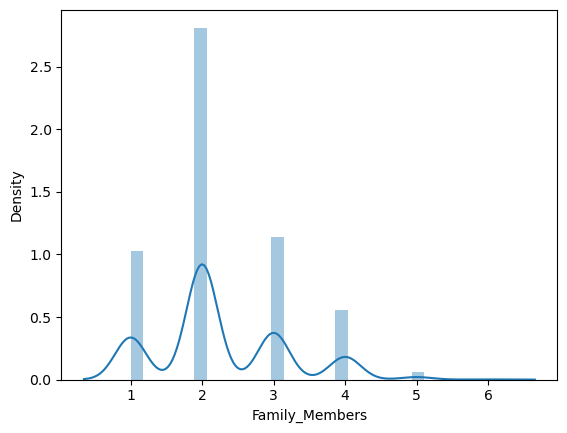

In [36]:
numerical_columns = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
for values in numerical_columns:
    sns.distplot(df[values]);
    plt.show()

In [37]:
df['CHILDREN'].skew()

1.395222463655898

In [38]:
df['Annual_income'].skew()

4.062875573502619

In [39]:
df['Birthday_count'].skew()

0.24485270658233024

In [40]:
df['Employed_days'].skew()

1.6859856403818216

In [41]:
df['Employed_days'].unique()

array([  586,   678,  1002,   913,   248,  2470,  1644,  4327,  1674,
        1086,   925,   854,   185,  3350,   691,  4770,  2394,   384,
        3647,  1546,   808,  1285,   855,  7369,  2269,  4114,  1161,
        7288,   166,   866,   564,  3366,  2150,  1458,  8369,   508,
        1567,   137,  3974,  1570,  2878,   140,  2576,  1905,  1724,
        1328,  4987,  3496,  1394,  1265,  2531,  2105,   860,   217,
         535,  6866,   584,  2227,  8161,   613,   606,  6944,   346,
        1808,  3420,   863,  7413,  7553,  3931,  1039,   134,   622,
        1595,  1626,  1868,   555,  1935,   931,   900,  4305,   499,
        2418,   189,  1132,  1770,   919,  1081,   502,  2420,  1325,
        6367,  2484,   341,  9422,  3054,  2987,  2128,   820,   141,
        1692,  4686,   693,   567,   885,  2769,  1547,  3179,  5204,
        3072,   320,  2469,   583,   834,  1085,  1399,  7310,  1748,
        2479,   875,  2805,  2477,  1477,  1782,   431,  1416,   263,
        2349,   412,

In [42]:
df['Family_Members'].skew()

0.6740545882197315

In [43]:
constant = 1
df['CHILDREN'] = np.log(df['CHILDREN'] + constant)
df['CHILDREN'].skew()

0.948908384378387

In [44]:
df['Annual_income'] = np.log(df['Annual_income'])
df['Annual_income'].skew()

0.27626915017132003

In [45]:
df['Birthday_count'].skew()

0.24485270658233024

In [46]:
df['Employed_days'] = np.log(df['Employed_days'])
df['Employed_days'].skew()

-0.6101818645042053

In [47]:
df['Family_Members'] = np.log(df['Family_Members'])
df['Family_Members'].skew()

-0.3173551651815641

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


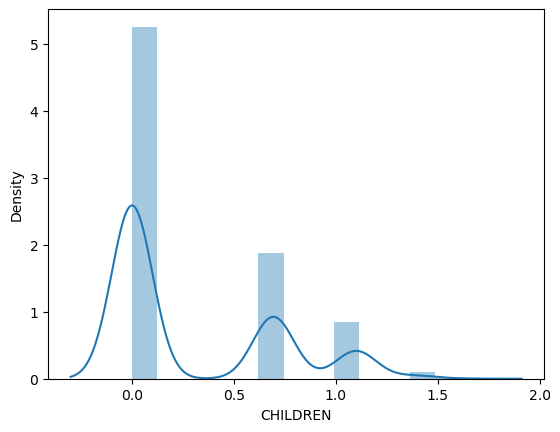

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


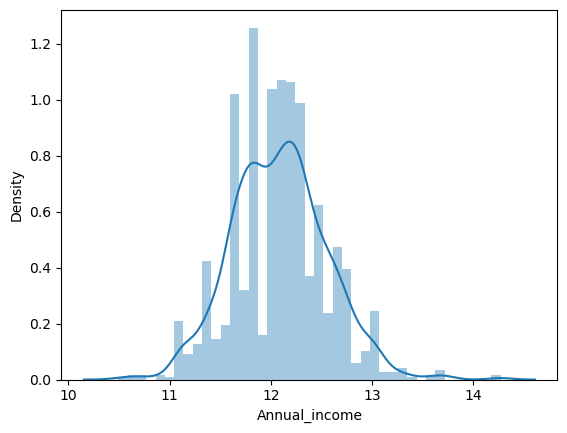

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


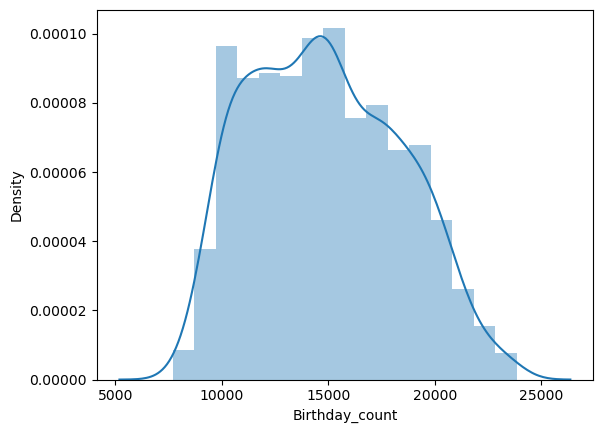

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


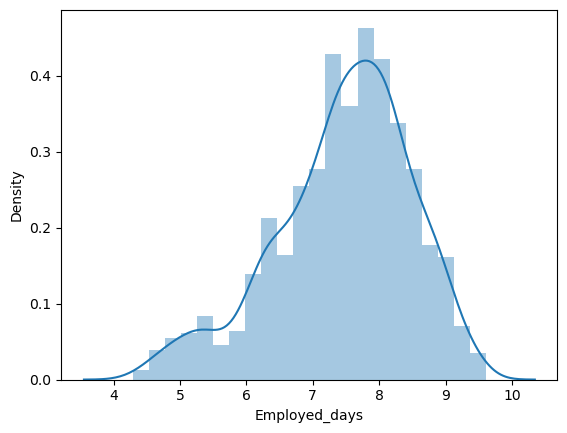

C:\Users\A\AppData\Local\Temp\ipykernel_18144\2270934550.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[values]);


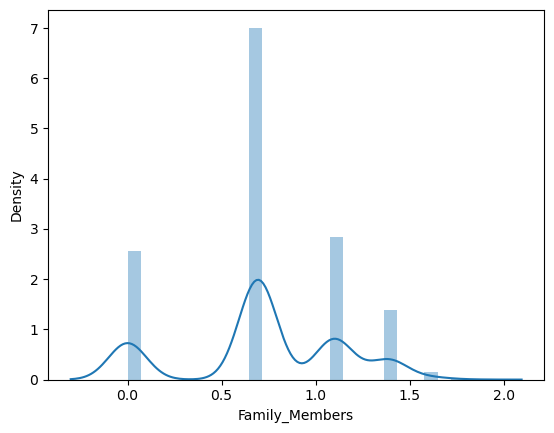

In [48]:
numerical_columns = ['CHILDREN', 'Annual_income', 'Birthday_count', 'Employed_days', 'Family_Members']
for values in numerical_columns:
    sns.distplot(df[values]);
    plt.show()

#### We Encode Categorical Data

In [49]:
X = df.drop('label', axis=1)
y = df['label']

In [50]:
X

,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
1,F,Y,N,0.000000,12.660328,Commercial associate,Higher education,Married,House / apartment,13557.00,6.373320,1,1,1,0,Others,0.693147
2,F,Y,N,0.000000,12.660328,Commercial associate,Higher education,Married,House / apartment,14852.28,6.373320,1,1,1,0,Others,0.693147
3,F,Y,N,0.000000,12.203866,Commercial associate,Higher education,Married,House / apartment,13557.00,6.373320,1,1,1,0,Others,0.693147
4,F,Y,N,0.000000,12.660328,Commercial associate,Higher education,Married,House / apartment,13557.00,6.373320,1,1,1,0,Others,0.693147
5,F,Y,N,0.000000,12.660328,Pensioner,Higher education,Married,House / apartment,13557.00,6.373320,1,1,1,0,Others,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,F,N,Y,0.000000,12.203866,Commercial associate,Higher education,Married,House / apartment,11957.00,7.687997,1,0,0,0,Managers,0.693147
1544,F,N,N,0.000000,12.323856,Commercial associate,Incomplete higher,Single / not married,House / apartment,10229.00,7.097549,1,0,0,0,Accountants,0.000000
1545,M,Y,Y,1.098612,12.100712,Working,Higher education,Married,House / apartment,13174.00,7.814803,1,0,0,0,Managers,1.386294
1546,M,Y,N,0.000000,12.506177,Working,Secondary / secondary special,Civil marriage,House / apartment,15292.00,6.469250,1,1,1,0,Drivers,0.693147


In [51]:
y

1       1
2       1
3       1
4       1
5       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1286, dtype: int64

In [52]:
#df = pd.get_dummies(df, dtype='int')

X = pd.get_dummies(X, dtype='int')
X

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,...,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
1,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,...,0,0,0,1,0,0,0,0,0,0
2,0.000000,12.660328,14852.28,6.373320,1,1,1,0,0.693147,1,...,0,0,0,1,0,0,0,0,0,0
3,0.000000,12.203866,13557.00,6.373320,1,1,1,0,0.693147,1,...,0,0,0,1,0,0,0,0,0,0
4,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,...,0,0,0,1,0,0,0,0,0,0
5,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.000000,12.203866,11957.00,7.687997,1,0,0,0,0.693147,1,...,0,1,0,0,0,0,0,0,0,0
1544,0.000000,12.323856,10229.00,7.097549,1,0,0,0,0.000000,1,...,0,0,0,0,0,0,0,0,0,0
1545,1.098612,12.100712,13174.00,7.814803,1,0,0,0,1.386294,0,...,0,1,0,0,0,0,0,0,0,0
1546,0.000000,12.506177,15292.00,6.469250,1,1,1,0,0.693147,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X.shape

(1286, 54)

In [54]:
pd.set_option('display.max_columns', 54)
X

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
1,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.000000,12.660328,14852.28,6.373320,1,1,1,0,0.693147,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.000000,12.203866,13557.00,6.373320,1,1,1,0,0.693147,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,0.000000,12.660328,13557.00,6.373320,1,1,1,0,0.693147,1,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,0.000000,12.203866,11957.00,7.687997,1,0,0,0,0.693147,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1544,0.000000,12.323856,10229.00,7.097549,1,0,0,0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1545,1.098612,12.100712,13174.00,7.814803,1,0,0,0,1.386294,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1546,0.000000,12.506177,15292.00,6.469250,1,1,1,0,0.693147,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### We scale our Data

In [55]:
scaler = MinMaxScaler()
scaled_features = [features for features in X.columns]
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(data = scaled_data, columns= scaled_features)
X

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,0.000000,0.574053,0.362600,0.391678,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.574053,0.442858,0.391678,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.453248,0.362600,0.391678,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.574053,0.362600,0.391678,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.574053,0.362600,0.391678,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0.000000,0.453248,0.263461,0.638901,0.0,0.0,0.0,0.0,0.386853,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1282,0.000000,0.485003,0.156391,0.527868,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1283,0.682606,0.425947,0.338869,0.662747,0.0,0.0,0.0,0.0,0.773706,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1284,0.000000,0.533256,0.470103,0.409718,0.0,1.0,1.0,0.0,0.386853,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### We Split Dataset into Traning and Test Set

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)


In [57]:
X_train

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
358,0.682606,0.242502,0.251379,0.429356,0.0,0.0,0.0,0.0,0.773706,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,0.000000,0.301558,0.503997,0.552881,0.0,0.0,1.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
764,0.000000,0.242502,0.243757,0.718564,0.0,1.0,0.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
135,0.430677,0.668449,0.132722,0.362583,0.0,0.0,1.0,1.0,0.613147,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277,0.000000,0.652073,0.357829,0.708124,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.682606,0.107309,0.220770,0.777508,0.0,1.0,0.0,0.0,0.773706,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.000000,0.290754,0.281554,0.710612,0.0,1.0,0.0,0.0,0.386853,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,0.430677,0.485003,0.360803,0.488379,0.0,1.0,1.0,0.0,0.613147,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.430677,0.349810,0.105211,0.622429,0.0,1.0,1.0,0.0,0.613147,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
X_test

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
1246,0.000000,0.059056,0.386393,0.806990,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.000000,0.390607,0.370345,0.343269,0.0,1.0,1.0,0.0,0.386853,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
937,0.000000,0.425947,0.524196,0.461174,0.0,1.0,0.0,0.0,0.386853,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.000000,0.468628,0.429457,0.782794,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1206,0.682606,0.340838,0.479026,0.726464,0.0,0.0,0.0,0.0,0.773706,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.000000,0.425947,0.897515,0.370290,0.0,0.0,0.0,0.0,0.386853,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.000000,0.390607,0.743355,0.922714,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,0.000000,0.510228,0.418675,0.609985,0.0,0.0,1.0,1.0,0.386853,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
858,0.430677,0.425947,0.480575,0.672221,0.0,1.0,1.0,0.0,0.613147,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y_train

436     0
1309    0
921     0
170     1
340     0
       ..
1254    0
1315    0
1354    0
1032    0
1349    0
Name: label, Length: 1028, dtype: int64

In [60]:
y_test

1502    0
407     0
1128    0
500     0
1451    0
       ..
961     0
652     0
1388    0
1030    0
1318    0
Name: label, Length: 258, dtype: int64

#### We import the Models we want to use for our Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [62]:
random_seed = 42
np.random.seed(random_seed)

In [63]:
models = [('Random Forest', RandomForestClassifier()),
          ('Logistic Regression', LogisticRegression()),
          ('Decision Tree', DecisionTreeClassifier())]

In [64]:
results = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_seed)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append((name, cv_scores.mean(), cv_scores.std()))

In [65]:
for name, mean_score, std_score in results:
    print(f'{name}: Mean Accuracy={mean_score:.4f}, Std = {std_score:.4f}')

Random Forest: Mean Accuracy=0.9290, Std = 0.0073
Logistic Regression: Mean Accuracy=0.8930, Std = 0.0061
Decision Tree: Mean Accuracy=0.8764, Std = 0.0163


#### We fit the model with the highest Accuracy into our Machine Learning Algorithm to train

In [66]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#### We Test the Accuracy of our Credit Card Approval Classificstion Model

In [67]:
model.score(X_train, y_train)

0.995136186770428

In [68]:
X_test

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,Housing_type_Co-op apartment,Housing_type_House / apartment,Housing_type_Municipal apartment,Housing_type_Office apartment,Housing_type_Rented apartment,Housing_type_With parents,Type_Occupation_Accountants,Type_Occupation_Cleaning staff,Type_Occupation_Cooking staff,Type_Occupation_Core staff,Type_Occupation_Drivers,Type_Occupation_HR staff,Type_Occupation_High skill tech staff,Type_Occupation_IT staff,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Others,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
1246,0.000000,0.059056,0.386393,0.806990,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.000000,0.390607,0.370345,0.343269,0.0,1.0,1.0,0.0,0.386853,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
937,0.000000,0.425947,0.524196,0.461174,0.0,1.0,0.0,0.0,0.386853,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
413,0.000000,0.468628,0.429457,0.782794,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1206,0.682606,0.340838,0.479026,0.726464,0.0,0.0,0.0,0.0,0.773706,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798,0.000000,0.425947,0.897515,0.370290,0.0,0.0,0.0,0.0,0.386853,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
538,0.000000,0.390607,0.743355,0.922714,0.0,1.0,1.0,0.0,0.386853,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1157,0.000000,0.510228,0.418675,0.609985,0.0,0.0,1.0,1.0,0.386853,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
858,0.430677,0.425947,0.480575,0.672221,0.0,1.0,1.0,0.0,0.613147,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [70]:
np.array([y_test])

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9109


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       232
           1       0.71      0.19      0.30        26

    accuracy                           0.91       258
   macro avg       0.82      0.59      0.63       258
weighted avg       0.90      0.91      0.89       258



In [73]:
accuracy = model.score(X_test, y_test)
accuracy

0.9108527131782945

#### Our Model attains a minimum Accuracy score of 91%